## **BIVARIATE ANALYSIS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_colWidth' , None)

In [3]:
df = pd.read_csv('Gurgaon_Properties_cleaned_V2.csv').drop_duplicates()

In [4]:
df.columns

Index(['Property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3677 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property_type        3677 non-null   object 
 1   society              3676 non-null   object 
 2   sector               3677 non-null   object 
 3   price                3660 non-null   float64
 4   price_per_sqft       3660 non-null   float64
 5   area                 3660 non-null   float64
 6   areaWithType         3677 non-null   object 
 7   bedRoom              3677 non-null   int64  
 8   bathroom             3677 non-null   int64  
 9   balcony              3677 non-null   object 
 10  floorNum             3658 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3677 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1690 non-null   float64
 15  carpet_area          1872 non-null   float6

In [6]:
df.head(2)

Property_type             society     sector  price  price_per_sqft    area  \
0         house         independent  sector 12   2.90         10740.0  2700.0   
1          flat  umang winter hills  sector 77   0.86          6408.0  1342.0   

                             areaWithType  bedRoom  bathroom balcony  \
0            Plot area 2700(250.84 sq.m.)        7         7       3   
1  Super Built up area 1342(124.68 sq.m.)        2         2       2   

   floorNum      facing agePossession  super_built_up_area  built_up_area  \
0       2.0  South-West  Old Property                  NaN         2700.0   
1      16.0         NaN  New Property               1342.0            NaN   

   carpet_area  study room  servant room  store room  pooja room  others  \
0          NaN           0             0           0           0       0   
1          NaN           0             0           0           0       0   

   furnishing_type  luxury_score  
0                1             7  
1                2            79

In [7]:
df.shape

(3677, 23)

In [8]:
df.duplicated().sum()

np.int64(0)

# property_type vs price

<Axes: xlabel='Property_type', ylabel='price'>

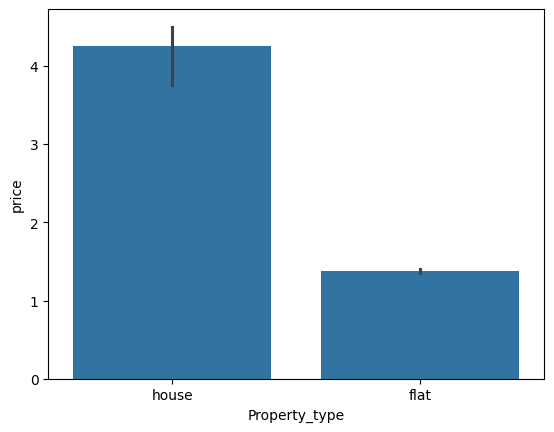

In [12]:
sns.barplot(x = 'Property_type', y = 'price' , data = df , estimator = np.median)

<Axes: xlabel='Property_type', ylabel='price'>

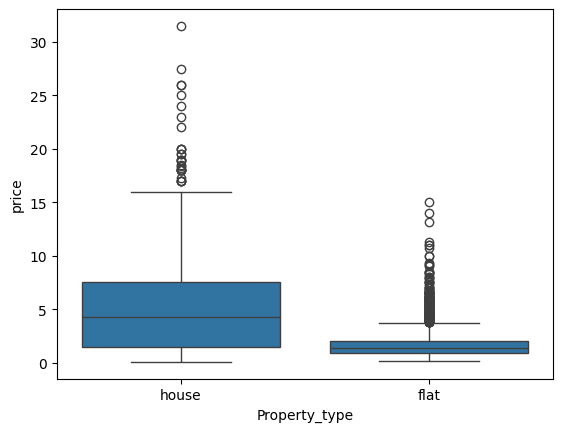

In [13]:
sns.boxplot(x = 'Property_type', y = 'price' , data = df)

**Observations**
- House price and range are more than from flat

##  **property_type vs area**

<Axes: xlabel='Property_type', ylabel='built_up_area'>

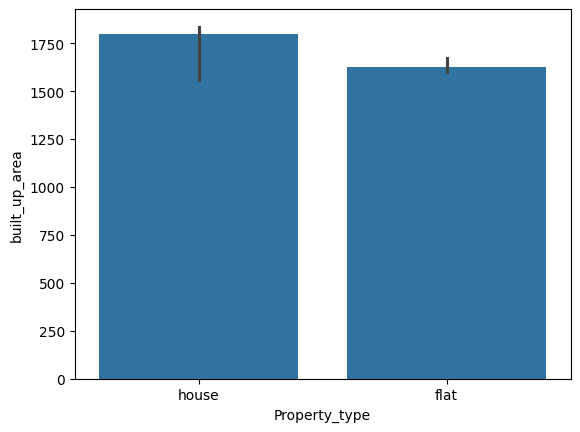

In [23]:
sns.barplot(x = 'Property_type' , y = 'built_up_area', data = df , estimator = np.median)

<Axes: xlabel='Property_type', ylabel='built_up_area'>

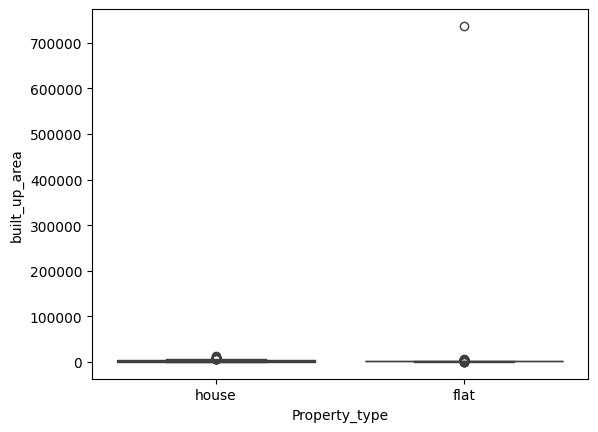

In [17]:
sns.boxplot(x = 'Property_type', y = 'built_up_area' , data = df)

In [18]:
df[df['built_up_area'] == 737147]  # this is a villa not a house or flat

Property_type            society      sector  price  price_per_sqft  \
1669          flat  hcbs sports ville  sohna road   0.35             4.0   

          area                           areaWithType  bedRoom  bathroom  \
1669  875000.0  Built Up area: 737147 (68483.2 sq.m.)        2         2   

     balcony  floorNum facing   agePossession  super_built_up_area  \
1669       2       8.0    NaN  Relatively New                  NaN   

      built_up_area  carpet_area  study room  servant room  store room  \
1669       737147.0          NaN           0             0           0   

      pooja room  others  furnishing_type  luxury_score  
1669           0       0                0            44

In [19]:
# removing that outlier
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='Property_type', ylabel='built_up_area'>

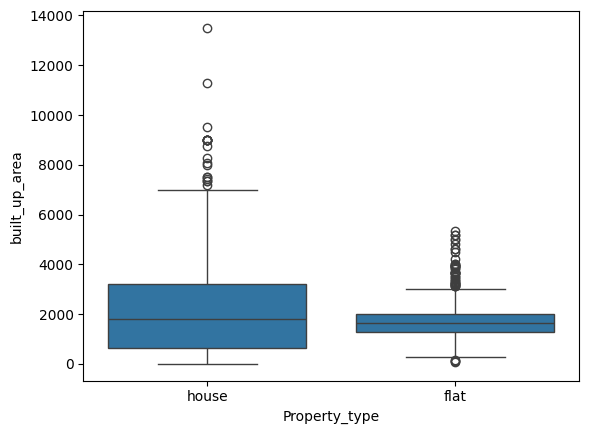

In [20]:
sns.boxplot(x = 'Property_type', y = 'built_up_area' , data = df)

**Observations**
- range and area of house is more than from flat

## **Property_type vs price per sqft**

<Axes: xlabel='Property_type', ylabel='price_per_sqft'>

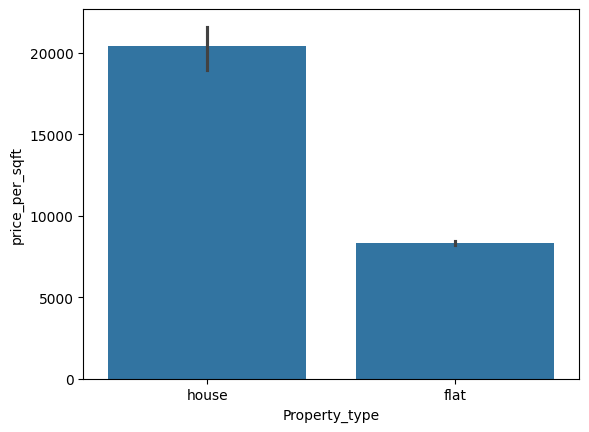

In [22]:
sns.barplot(x = 'Property_type' , y = 'price_per_sqft', data = df , estimator = np.median)

<Axes: xlabel='Property_type', ylabel='price_per_sqft'>

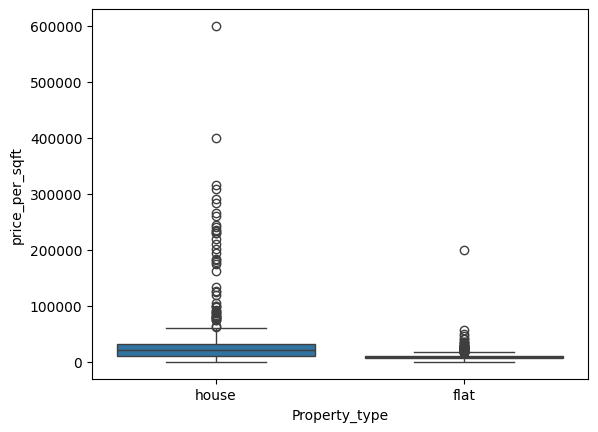

In [25]:
sns.boxplot(x = 'Property_type', y = 'price_per_sqft' , data = df)

In [28]:
# check outliers
df[df['price_per_sqft'] > 100000][['Property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

Property_type                      society     sector  price  \
3            house       dlf city plots phase 2  sector 25  10.00   
24           house               uppal southend  sector 49   6.75   
41           house                  independent  sector 24  10.00   
43           house                  independent  sector 17   3.50   
46           house            vatika india next  sector 82   7.00   
272          house                  independent  sector 54   3.75   
406          house       dlf city plots phase 2  sector 25  10.50   
472          house  unitech nirvana birch court  sector 50   7.10   
610          house                  independent  sector 57   8.00   
688          house                   ardee city  sector 52   5.50   
955          house                  independent  sector 23   2.80   
1124         house                  independent  sector 12   3.50   
1385         house           vipul tatvam villa  sector 48   7.25   
1539         house                  independent  sector 28   4.50   
1732         house       unitech deerwood chase  sector 50   8.45   
2002          flat           ambience caitriona  sector 24  14.00   
2018         house       emaar the palm springs  sector 54  24.00   
2105         house     unitech uniworld resorts  sector 33   9.50   
2268         house          huda plot sector 38  sector 38   4.30   
2338         house                  independent  sector 38   8.00   
2548         house                dlf the grove  sector 54   5.70   
2787         house                    rk excelo  sector 12   0.60   
2901         house         bhim nagar, sector 6   sector 6   0.85   
3082         house     unitech uniworld resorts  sector 33  10.00   
3353         house                  independent   sector 4   0.60   
3450         house                  independent  sector 55   1.45   
3547         house         eros rosewood villas  sector 49   2.75   
3563         house                  independent  sector 12   6.00   
3585         house                        ansal  sector 43   1.85   

      price_per_sqft   area  \
3           400000.0  250.0   
24          290948.0  232.0   
41          229885.0  435.0   
43          218750.0  160.0   
46          194444.0  360.0   
272         234375.0  160.0   
406         261194.0  402.0   
472         283333.0  251.0   
610         266666.0  300.0   
688         183333.0  300.0   
955         161849.0  173.0   
1124        133079.0  263.0   
1385        201388.0  360.0   
1539        125000.0  360.0   
1732        235376.0  359.0   
2002        200000.0  700.0   
2018        600000.0  400.0   
2105        173992.0  546.0   
2268        245398.0  175.0   
2338        230547.0  347.0   
2548        211111.0  270.0   
2787        120000.0   50.0   
2901        126865.0   67.0   
3082        181818.0  550.0   
3353        105263.0   57.0   
3450        241666.0   60.0   
3547        178571.0  154.0   
3563        315789.0  190.0   
3585        308333.0   60.0   

                                                                                                    areaWithType  \
3                                                                                     Plot area 250(23.23 sq.m.)   
24                                                                                    Plot area 232(21.55 sq.m.)   
41                                                                                Carpet area: 435 (40.41 sq.m.)   
43                                                                              Built Up area: 160 (14.86 sq.m.)   
46    Plot area 360(33.45 sq.m.)Built Up area: 3900 sq.ft. (362.32 sq.m.)Carpet area: 3743 sq.ft. (347.74 sq.m.)   
272                                                                                   Plot area 160(14.86 sq.m.)   
406                                                                                   Plot area 402(37.35 sq.m.)   
472                                                                        

In [29]:
df.head()

Property_type                 society     sector  price  price_per_sqft  \
0         house             independent  sector 12   2.90         10740.0   
1          flat      umang winter hills  sector 77   0.86          6408.0   
2          flat      ambience creacions  sector 22   2.55         13709.0   
3         house  dlf city plots phase 2  sector 25  10.00        400000.0   
4         house    suncity essel towers  sector 28   8.95         17900.0   

     area  \
0  2700.0   
1  1342.0   
2  1860.0   
3   250.0   
4  5000.0   

                                                                                                            areaWithType  \
0                                                                                           Plot area 2700(250.84 sq.m.)   
1                                                                                 Super Built up area 1342(124.68 sq.m.)   
2  Super Built up area 1860(172.8 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.)   
3                                                                                             Plot area 250(23.23 sq.m.)   
4                                                                                           Plot area 5000(464.52 sq.m.)   

   bedRoom  bathroom balcony  floorNum      facing   agePossession  \
0        7         7       3       2.0  South-West    Old Property   
1        2         2       2      16.0         NaN    New Property   
2        3         3       3       8.0  North-East  Relatively New   
3       12        12      3+       4.0       North  Relatively New   
4        5         6      3+       4.0         NaN  Moderately Old   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0                  NaN         2700.0          NaN           0             0   
1               1342.0            NaN          NaN           0             0   
2               1860.0         1600.0       1400.0           0             0   
3                  NaN          250.0          NaN           1             1   
4                  NaN         5000.0          NaN           0             0   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                1             7  
1           0           0       0                2            79  
2           0           0       1                0           125  
3           0           0       0                2           114  
4           0           0       0                1             0

**Ovservations:**
- these are not outliers these are data error which is may be due to unit conversions


<Axes: xlabel='bedRoom', ylabel='Property_type'>

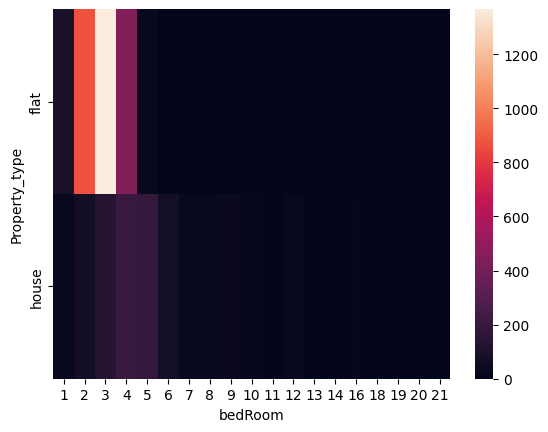

In [30]:
sns.heatmap(pd.crosstab(df['Property_type'],df['bedRoom']))

In [31]:
df[df['bedRoom'] > 10]

Property_type                      society      sector  price  \
3            house       dlf city plots phase 2   sector 25  10.00   
24           house               uppal southend   sector 49   6.75   
275          house                  independent   sector 11   4.50   
303          house                  independent   sector 46   6.50   
475          house                  independent   sector 43   2.20   
498          house                  independent   sector 54   5.00   
615          house       dlf city plots phase 3   sector 24   5.00   
653          house                  independent   sector 26  14.75   
749          house                  independent   sector 56  11.95   
834          house                  independent  sector 17a   3.87   
840          house                  independent   sector 43   4.50   
996          house                  independent   sector 28  11.00   
1010         house                  independent   sector 26   8.49   
1066         house                 malibu towne   sector 47   8.50   
1118         house                  independent   sector 25  16.00   
1128         house                  independent   sector 47   6.09   
1295         house                  independent   sector 14   8.00   
1421         house                  independent   sector 46   6.81   
1449         house                  independent   sector 31   9.25   
1462         house                  independent   sector 55   9.19   
1602         house                  independent   sector 40   9.50   
1681         house                  independent   sector 27   8.25   
1795         house       luxury dlf city floors   sector 26  20.00   
1860         house                private house   sector 55   7.05   
1879         house                  independent  sector 104   0.80   
1966         house                  independent   sector 25    NaN   
2268         house          huda plot sector 38   sector 38   4.30   
2303         house                  independent   sector 43   7.50   
2401         house                  independent   sector 24   3.20   
2403         house             dlf city phase 1   sector 26   9.25   
2468         house                  independent   sector 26  10.50   
2639         house                  independent   sector 43   3.00   
2656         house                  independent   sector 56  12.39   
2714         house                  independent  sector 17a   3.93   
2762         house                  independent   sector 43   2.25   
2785         house                          nul   sector 28  12.50   
2789         house                  independent   sector 28    NaN   
2836         house       laxmi garden sector-11   sector 11   1.50   
2845         house                  independent   sector 13   0.50   
2869         house                  independent   sector 54   5.50   
2896         house                  independent   sector 55   7.49   
2915         house                  independent   sector 26  26.00   
3114         house               dlf city plots   sector 26  20.00   
3164         house                  independent   sector 57   6.95   
3299         house                  independent   sector 40  12.00   
3374         house  independent house sector 45   sector 40   9.00   
3451         house                  independent   sector 43  13.50   
3482         house               uppal southend   sector 49   6.75   
3502         house                  independent   sector 56  11.50   
3584         house       luxury dlf city floors   sector 26   8.25   
3625         house    floor wise designer kothi   sector 25  13.00   
3761         house               uppal southend   sector 49   6.75   

      price_per_sqft    area  \
3           400000.0   250.0   
24          290948.0   232.0   
275          25000.0  1800.0   
303          27461.0  2367.0   
475           6875.0  3200.0   
498          43066.0  1161.0   
615          34083.0  1467.0   
653          51864.0  2844.0   
749   

<Axes: xlabel='Property_type', ylabel='floorNum'>

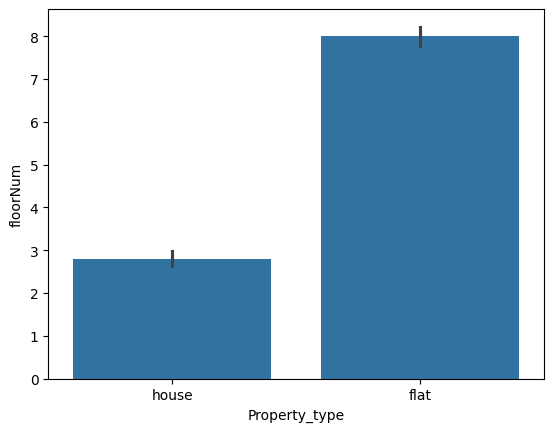

In [33]:
sns.barplot(x=df['Property_type'],y=df['floorNum'])

<Axes: xlabel='Property_type', ylabel='floorNum'>

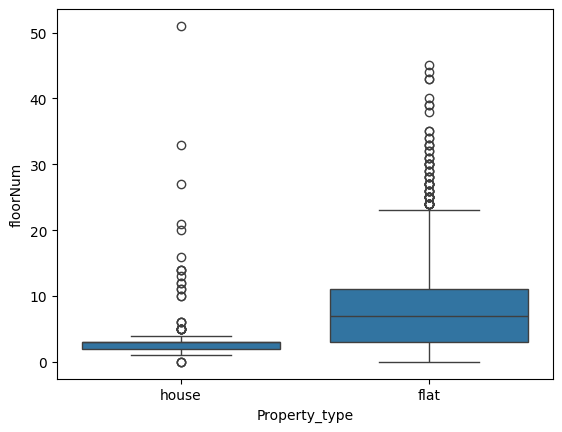

In [35]:
sns.boxplot(x=df['Property_type'],y=df['floorNum'])

In [37]:
# checking for outliers
df[(df['Property_type'] == 'house') & (df['floorNum'] > 10)]

Property_type                  society      sector  price  \
791          house      ireo victory valley   sector 67   8.00   
943          house               ninex city   sector 76   1.75   
1196         house          godrej meridien  sector 106   5.60   
1350         house   vatika the seven lamps   sector 82   1.60   
1583         house           dlf the arbour   sector 63   8.50   
1754         house              independent   sector 92   1.80   
1808         house              spaze privy   sector 72   3.10   
2293         house      satya the hermitage  sector 103   3.15   
2322         house              spaze privy   sector 72   3.09   
2661         house         suncity township   sector 54   2.00   
2679         house           ats tourmaline  sector 109   1.87   
2827         house        suncity avenue 76   sector 76   0.75   
3348         house  indiabulls centrum park  sector 103   3.25   
3562         house              greenopolis   sector 89   0.70   

      price_per_sqft    area  \
791          22222.0  3600.0   
943           6250.0  2800.0   
1196         14000.0  4000.0   
1350          6597.0  2425.0   
1583         21519.0  3950.0   
1754          7627.0  2360.0   
1808          8486.0  3653.0   
2293          6702.0  4700.0   
2322          6981.0  4426.0   
2661         30968.0   646.0   
2679          8697.0  2150.0   
2827         10067.0   745.0   
3348          8125.0  4000.0   
3562          5397.0  1297.0   

                                                                   areaWithType  \
791                                                 Plot area 400(334.45 sq.m.)   
943                                            Carpet area: 2800 (260.13 sq.m.)   
1196                                               Plot area 4000(371.61 sq.m.)   
1350                                               Plot area 2425(225.29 sq.m.)   
1583                                         Built Up area: 3950 (366.97 sq.m.)   
1754                                         Built Up area: 2360 (219.25 sq.m.)   
1808                                               Plot area 3653(339.37 sq.m.)   
2293                                         Built Up area: 4700 (436.64 sq.m.)   
2322  Built Up area: 3653 (339.37 sq.m.)Carpet area: 2922 sq.ft. (271.46 sq.m.)   
2661                   Plot area 60Built Up area: 60 sq.m.Carpet area: 59 sq.m.   
2679                                         Built Up area: 2150 (199.74 sq.m.)   
2827          Plot area 745(69.21 sq.m.)Built Up area: 745 sq.ft. (69.21 sq.m.)   
3348                                               Plot area 4000(371.61 sq.m.)   
3562                                          Built Up area: 1297 (120.5 sq.m.)   

      bedRoom  bathroom balcony  floorNum      facing   agePossession  \
791         6         7      3+      51.0  North-East  Moderately Old   
943         4         4       0      14.0         NaN       Undefined   
1196        5         4      3+      33.0  North-East    New Property   
1350        4         4      3+      16.0       North  Moderately Old   
1583        4         4      3+      27.0         NaN       Undefined   
1754        4         5       0      13.0         NaN       Undefined   
1808        5         5      3+      21.0         NaN  Relatively New   
2293        4         5       0      12.0        East       Undefined   
2322        5         5      3+      14.0        East  Relatively New   
2661        9         9       3      11.0       North  Relatively New   
2679        3         4       0      12.0         NaN       Undefined   
2827        2         2       2      11.0  North-East    New Property   
3348        4         3      3+      20.0         NaN    New Property   
3562        2         2       2      14.0  North-East       Undefined   

      super_built_up_area  built_up_area  carpet_area  study room  \
791                   NaN         3600.0          NaN           1   
943                   NaN            NaN       2800.0

- conclusion houses(villa) but in appartments

<Axes: xlabel='agePossession', ylabel='Property_type'>

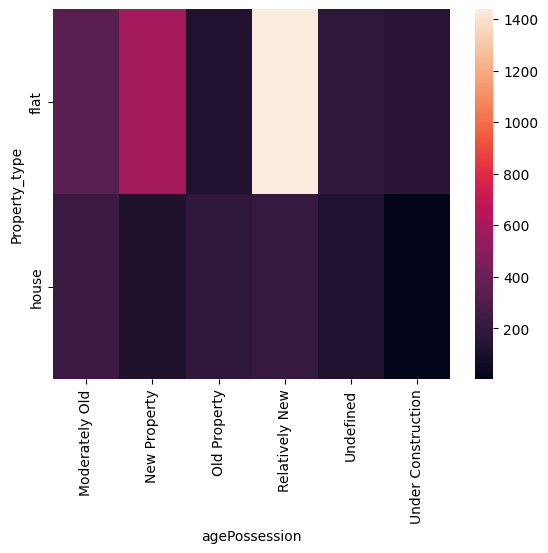

In [39]:
sns.heatmap(pd.crosstab(df['Property_type'],df['agePossession']))

<Axes: xlabel='agePossession', ylabel='Property_type'>

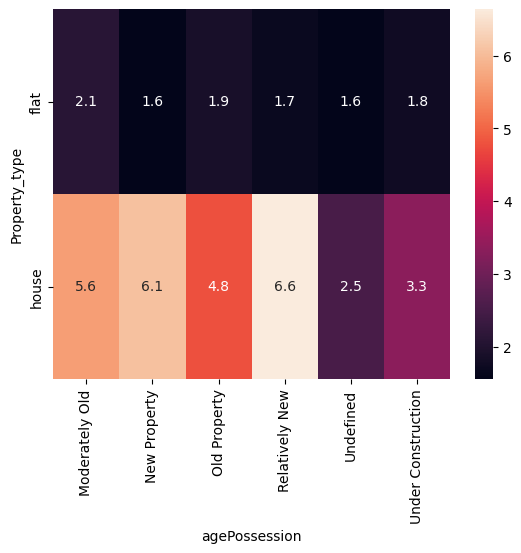

In [41]:
sns.heatmap(pd.pivot_table(df,index='Property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='bedRoom', ylabel='Property_type'>

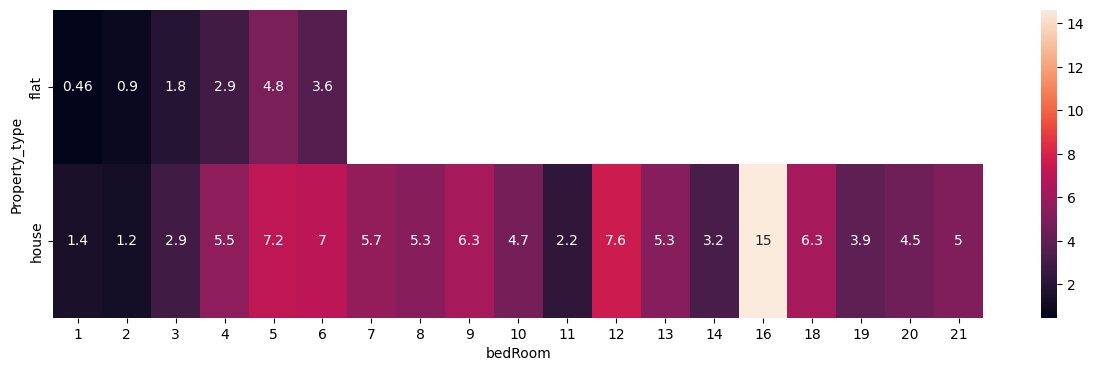

In [43]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='Property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='furnishing_type', ylabel='Property_type'>

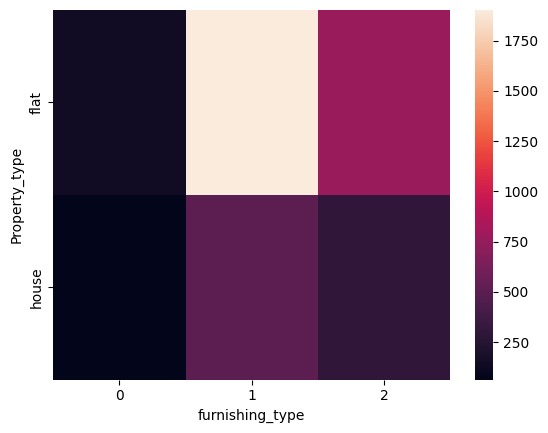

In [45]:
sns.heatmap(pd.crosstab(df['Property_type'],df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='Property_type'>

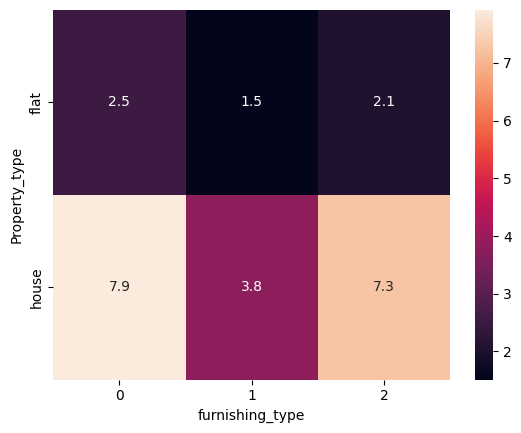

In [47]:
sns.heatmap(pd.pivot_table(df,index='Property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='Property_type', ylabel='luxury_score'>

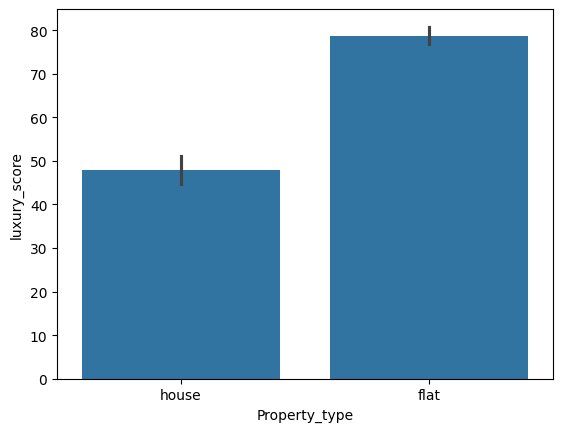

In [49]:
sns.barplot(x=df['Property_type'],y=df['luxury_score'])

<Axes: xlabel='Property_type', ylabel='luxury_score'>

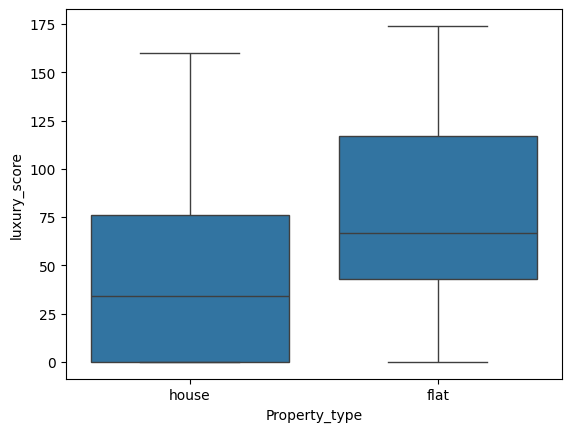

In [51]:
sns.boxplot(x=df['Property_type'],y=df['luxury_score'])

<Axes: xlabel='sector', ylabel='Property_type'>

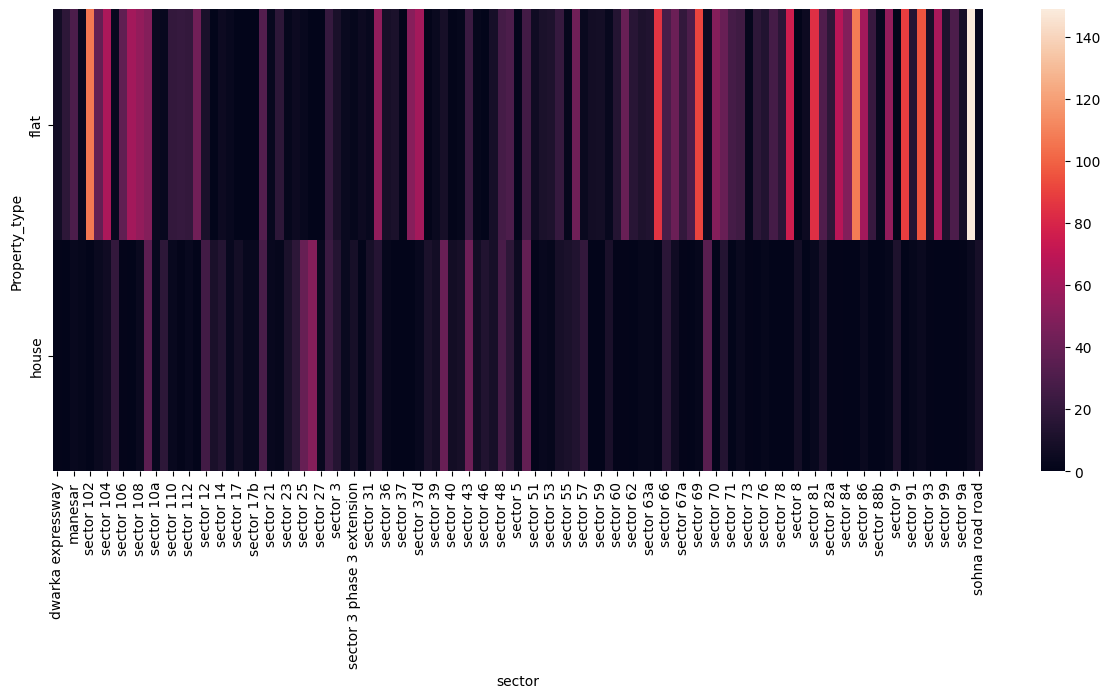

In [53]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['Property_type'],df['sector'].sort_index()))

**Observation:**
- new sector(onwards 70) having more no of flats
- old sector(1 to 60) having more no of house

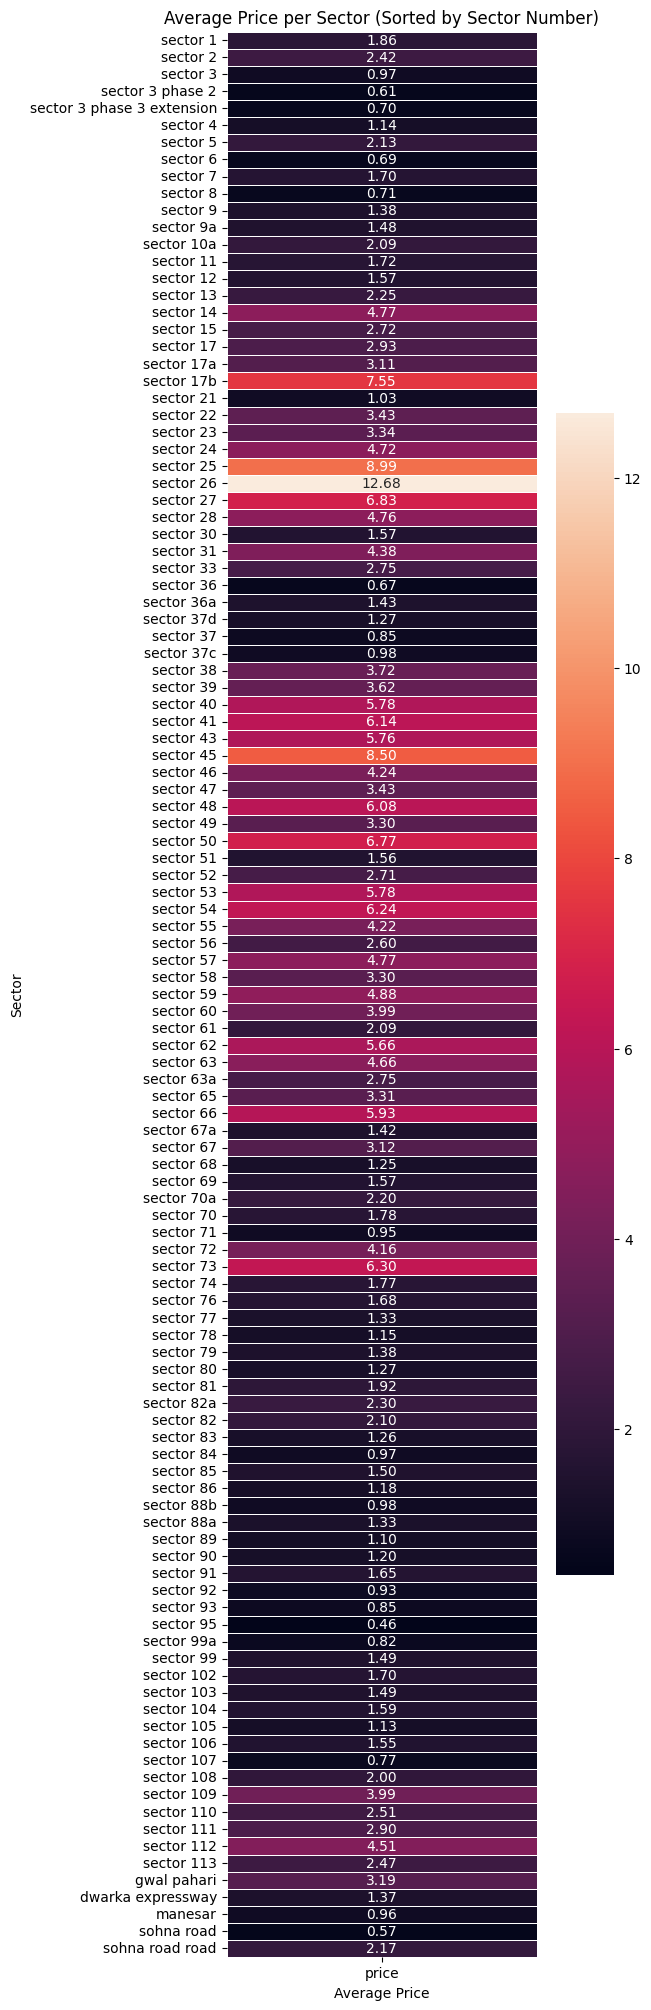

In [54]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

- sector 25 26 27 have most avg price
- 1 to 10 gurgaon is old gurgaon so prices are low
- new sector has low prices

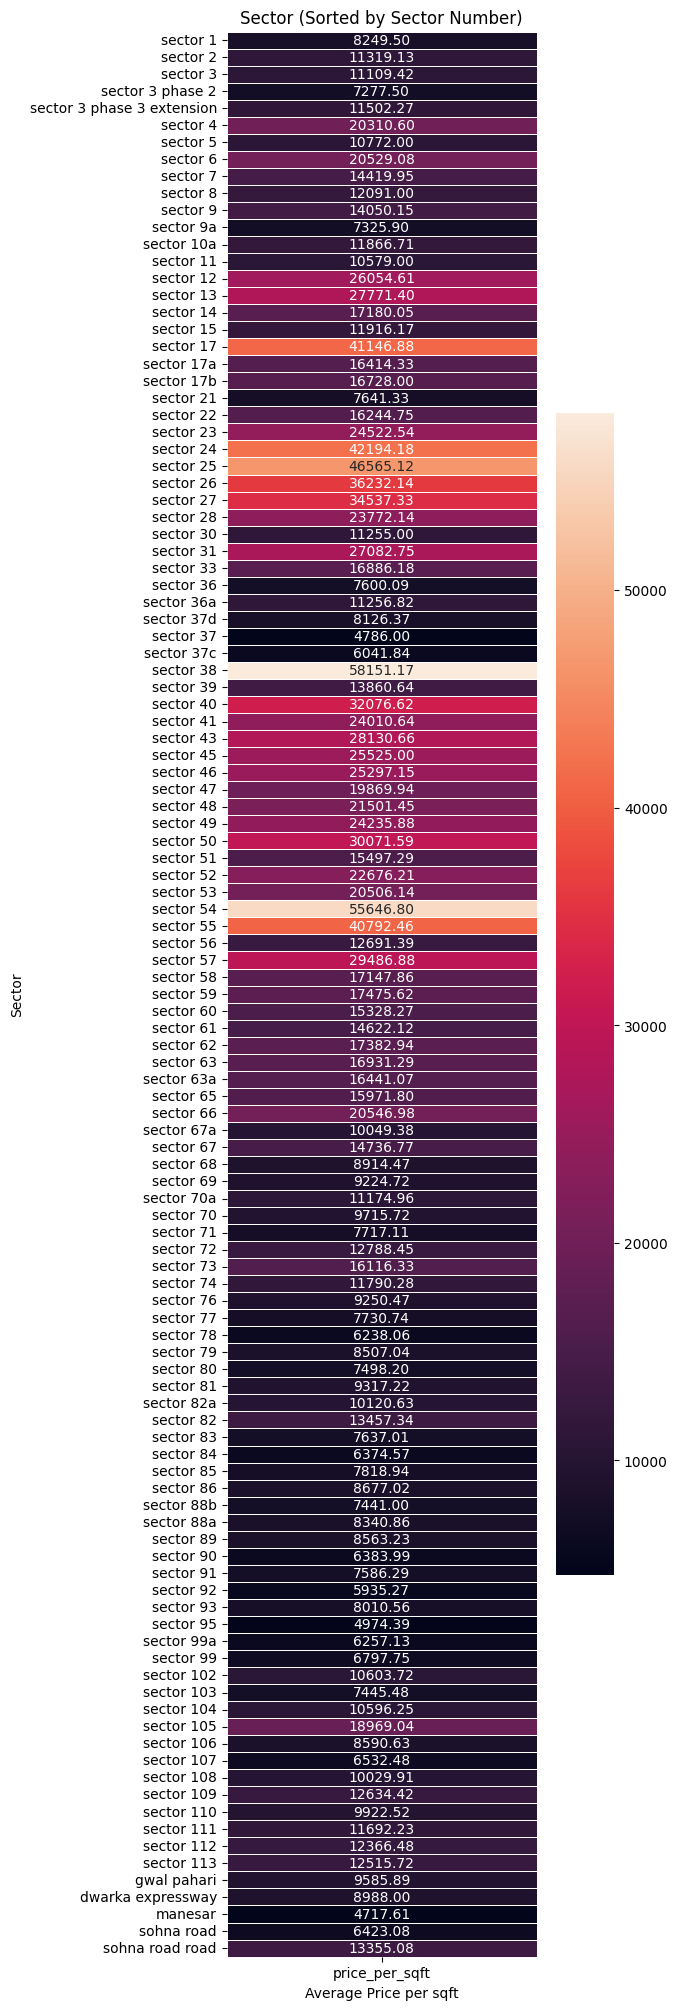

In [56]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

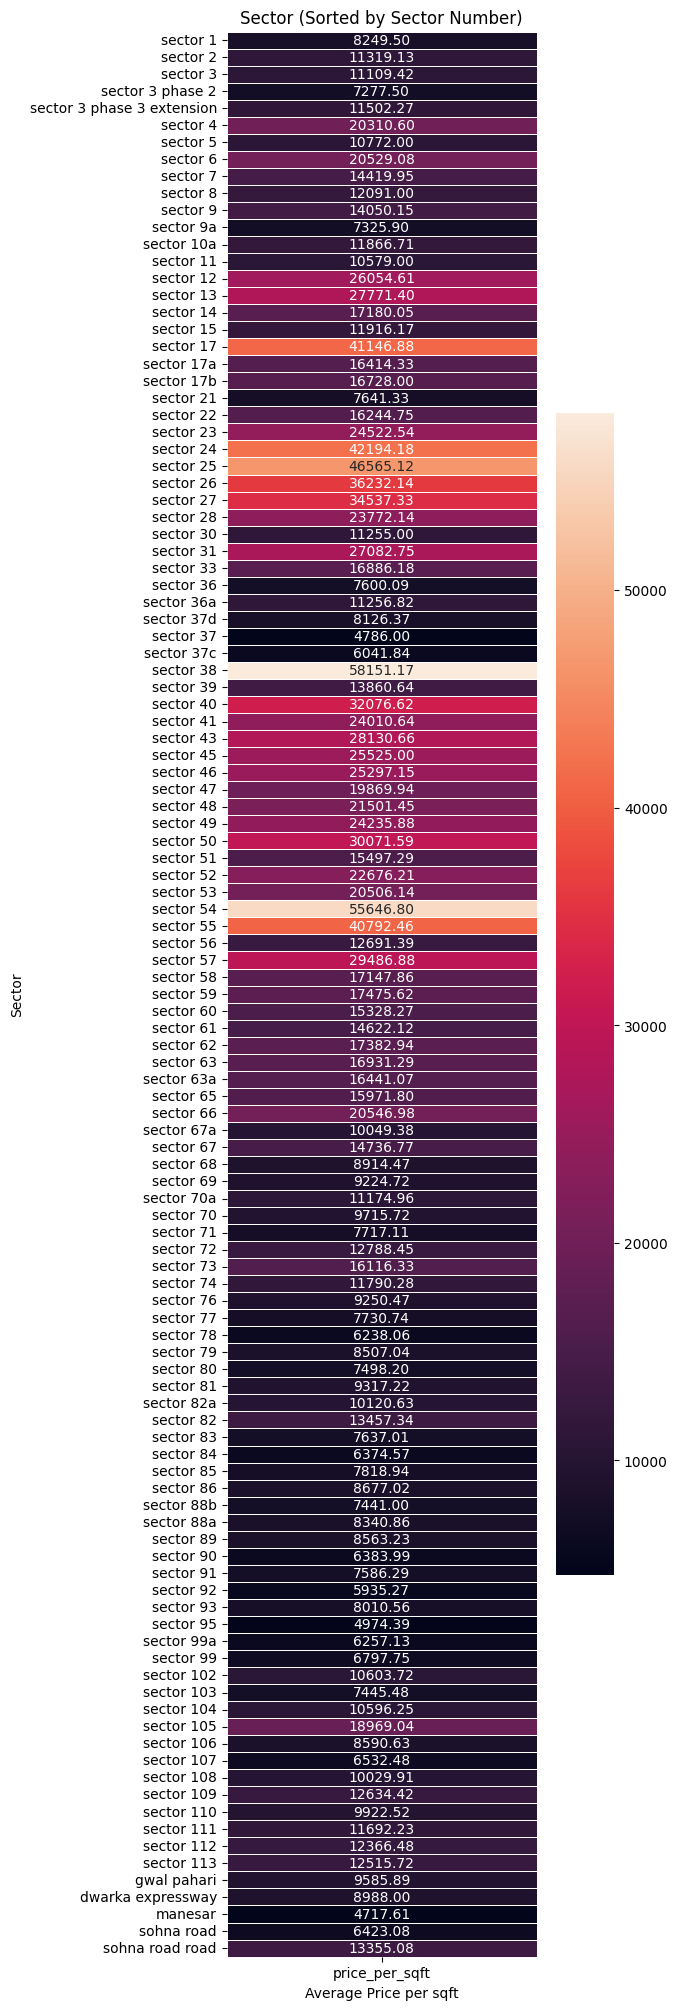

In [57]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

- new sector has luxuries property

## **PRICE**

<Axes: xlabel='area', ylabel='price'>

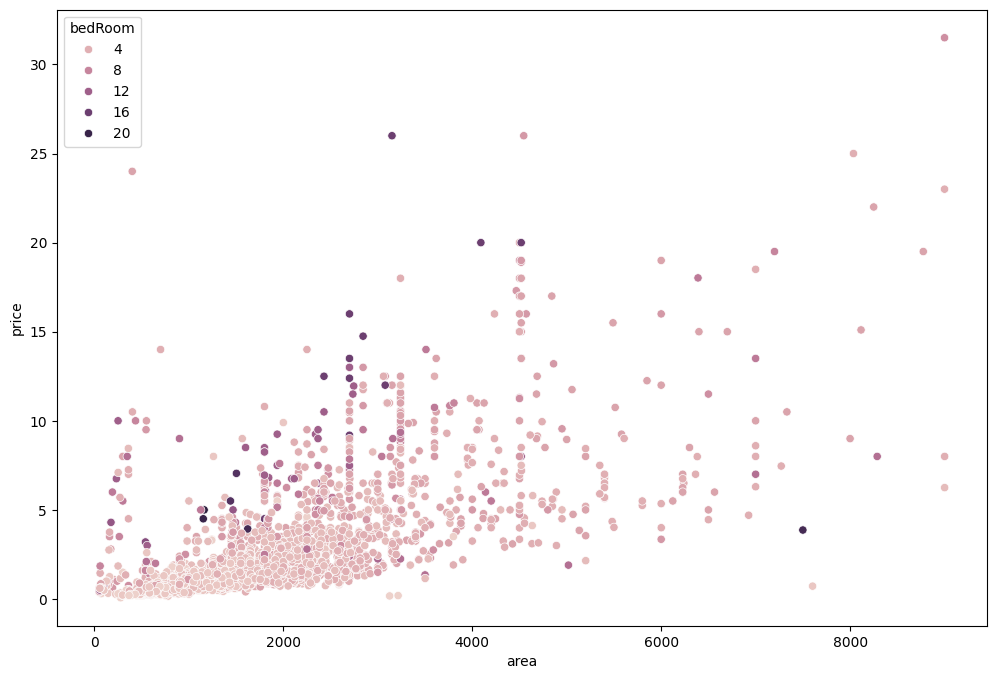

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['bedRoom'])

<Axes: xlabel='area', ylabel='price'>

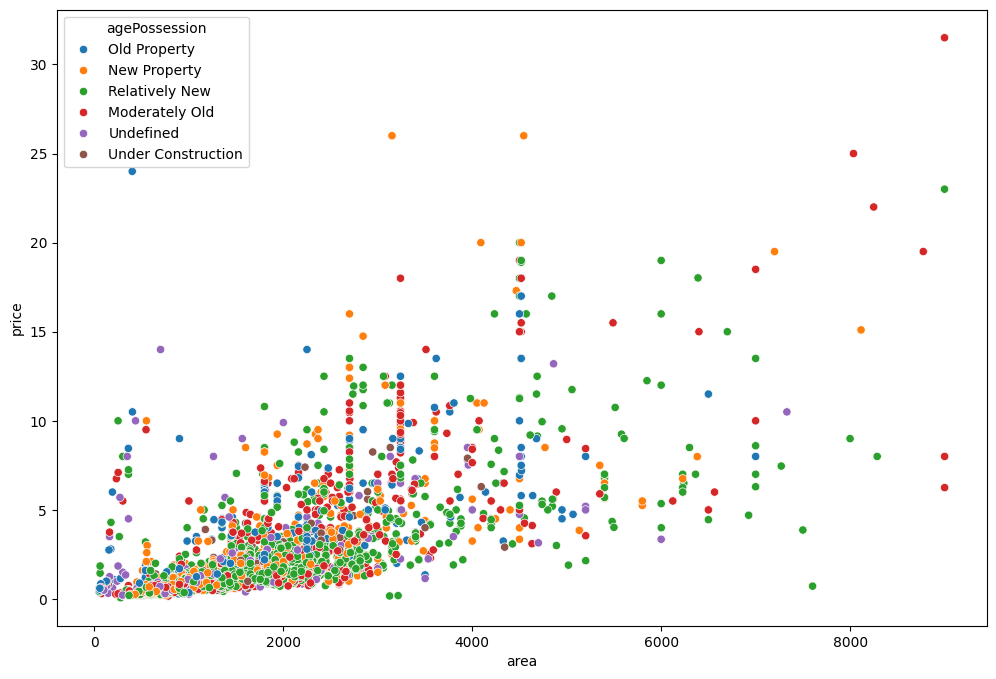

In [60]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df[df['area']<10000]['area'],y = df['price'],hue=df['agePossession'])

<Axes: xlabel='area', ylabel='price'>

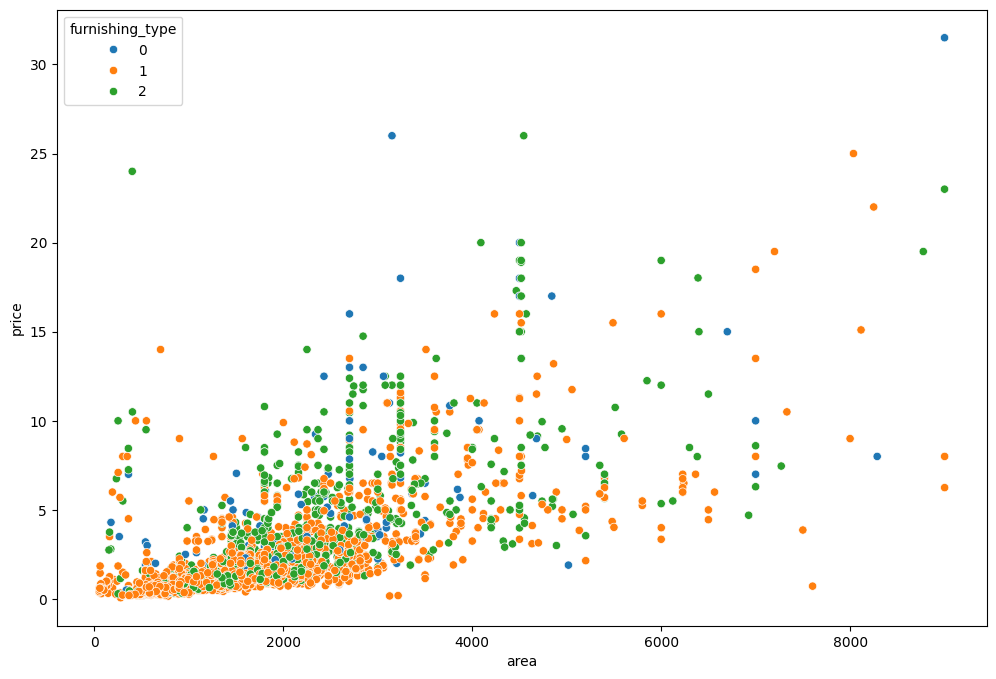

In [62]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = df[df['area']<10000]['area'], y = df['price'],hue=df['furnishing_type'].astype('category'))

<Axes: xlabel='bedRoom', ylabel='price'>

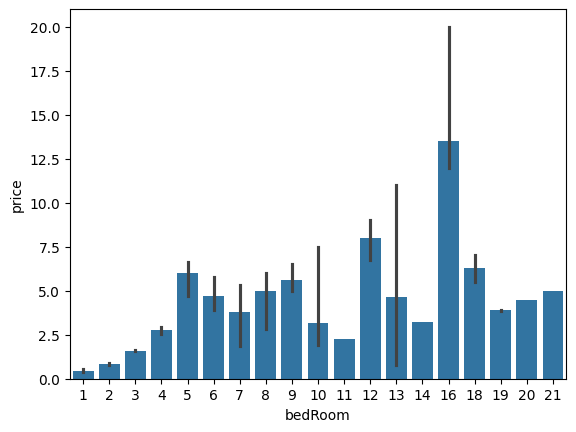

In [63]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median)

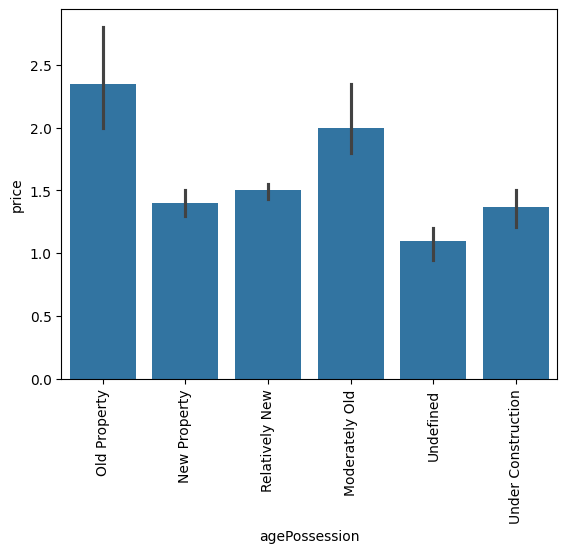

In [64]:
sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

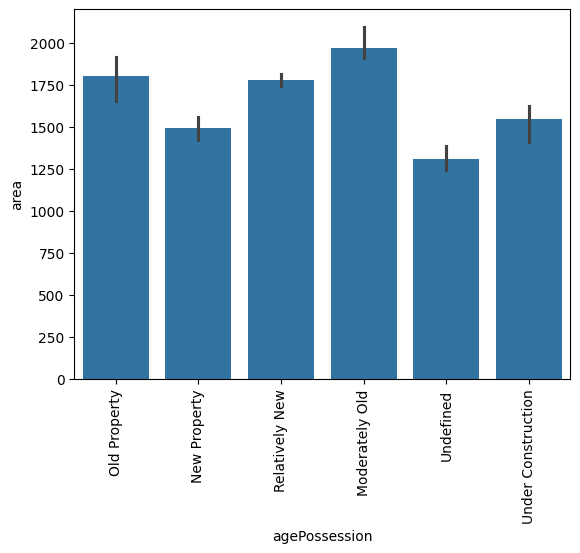

In [66]:
sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='furnishing_type', ylabel='price'>

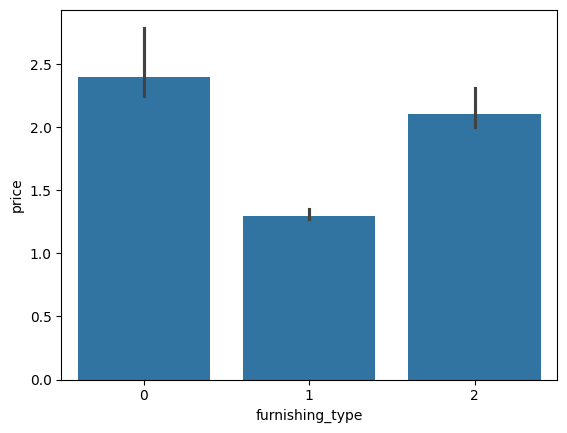

In [67]:
sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median)

<Axes: xlabel='luxury_score', ylabel='price'>

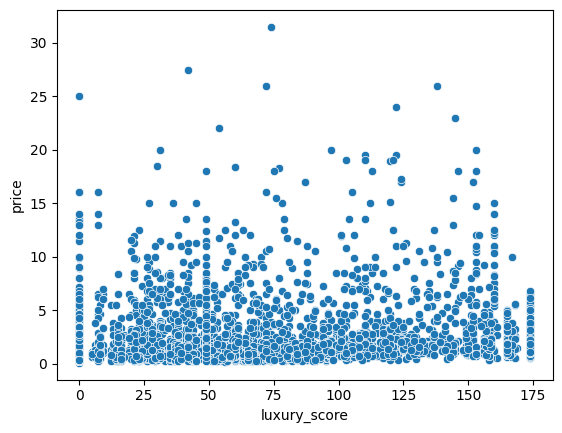

In [68]:
sns.scatterplot(x = df['luxury_score'],y = df['price'])

# Correlation

<Axes: >

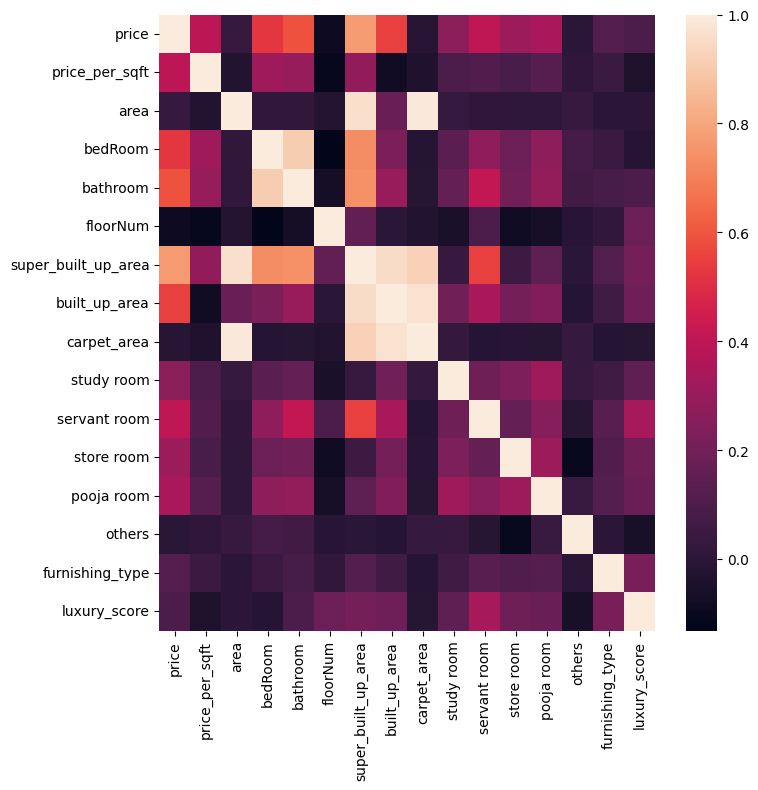

In [69]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True))

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

In [70]:
df.corr(numeric_only = True)['price'].sort_values(ascending=False)

price                  1.000000
super_built_up_area    0.769412
bathroom               0.589826
built_up_area          0.551649
bedRoom                0.522925
servant room           0.400927
price_per_sqft         0.391251
pooja room             0.341492
store room             0.309121
study room             0.258602
furnishing_type        0.113914
luxury_score           0.094775
area                   0.034720
others                -0.003525
carpet_area           -0.011344
floorNum              -0.094290
Name: price, dtype: float64

In [71]:
df.head()

Property_type                 society     sector  price  price_per_sqft  \
0         house             independent  sector 12   2.90         10740.0   
1          flat      umang winter hills  sector 77   0.86          6408.0   
2          flat      ambience creacions  sector 22   2.55         13709.0   
3         house  dlf city plots phase 2  sector 25  10.00        400000.0   
4         house    suncity essel towers  sector 28   8.95         17900.0   

     area  \
0  2700.0   
1  1342.0   
2  1860.0   
3   250.0   
4  5000.0   

                                                                                                            areaWithType  \
0                                                                                           Plot area 2700(250.84 sq.m.)   
1                                                                                 Super Built up area 1342(124.68 sq.m.)   
2  Super Built up area 1860(172.8 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.)   
3                                                                                             Plot area 250(23.23 sq.m.)   
4                                                                                           Plot area 5000(464.52 sq.m.)   

   bedRoom  bathroom balcony  floorNum      facing   agePossession  \
0        7         7       3       2.0  South-West    Old Property   
1        2         2       2      16.0         NaN    New Property   
2        3         3       3       8.0  North-East  Relatively New   
3       12        12      3+       4.0       North  Relatively New   
4        5         6      3+       4.0         NaN  Moderately Old   

   super_built_up_area  built_up_area  carpet_area  study room  servant room  \
0                  NaN         2700.0          NaN           0             0   
1               1342.0            NaN          NaN           0             0   
2               1860.0         1600.0       1400.0           0             0   
3                  NaN          250.0          NaN           1             1   
4                  NaN         5000.0          NaN           0             0   

   store room  pooja room  others  furnishing_type  luxury_score  
0           0           0       0                1             7  
1           0           0       0                2            79  
2           0           0       1                0           125  
3           0           0       0                2           114  
4           0           0       0                1             0

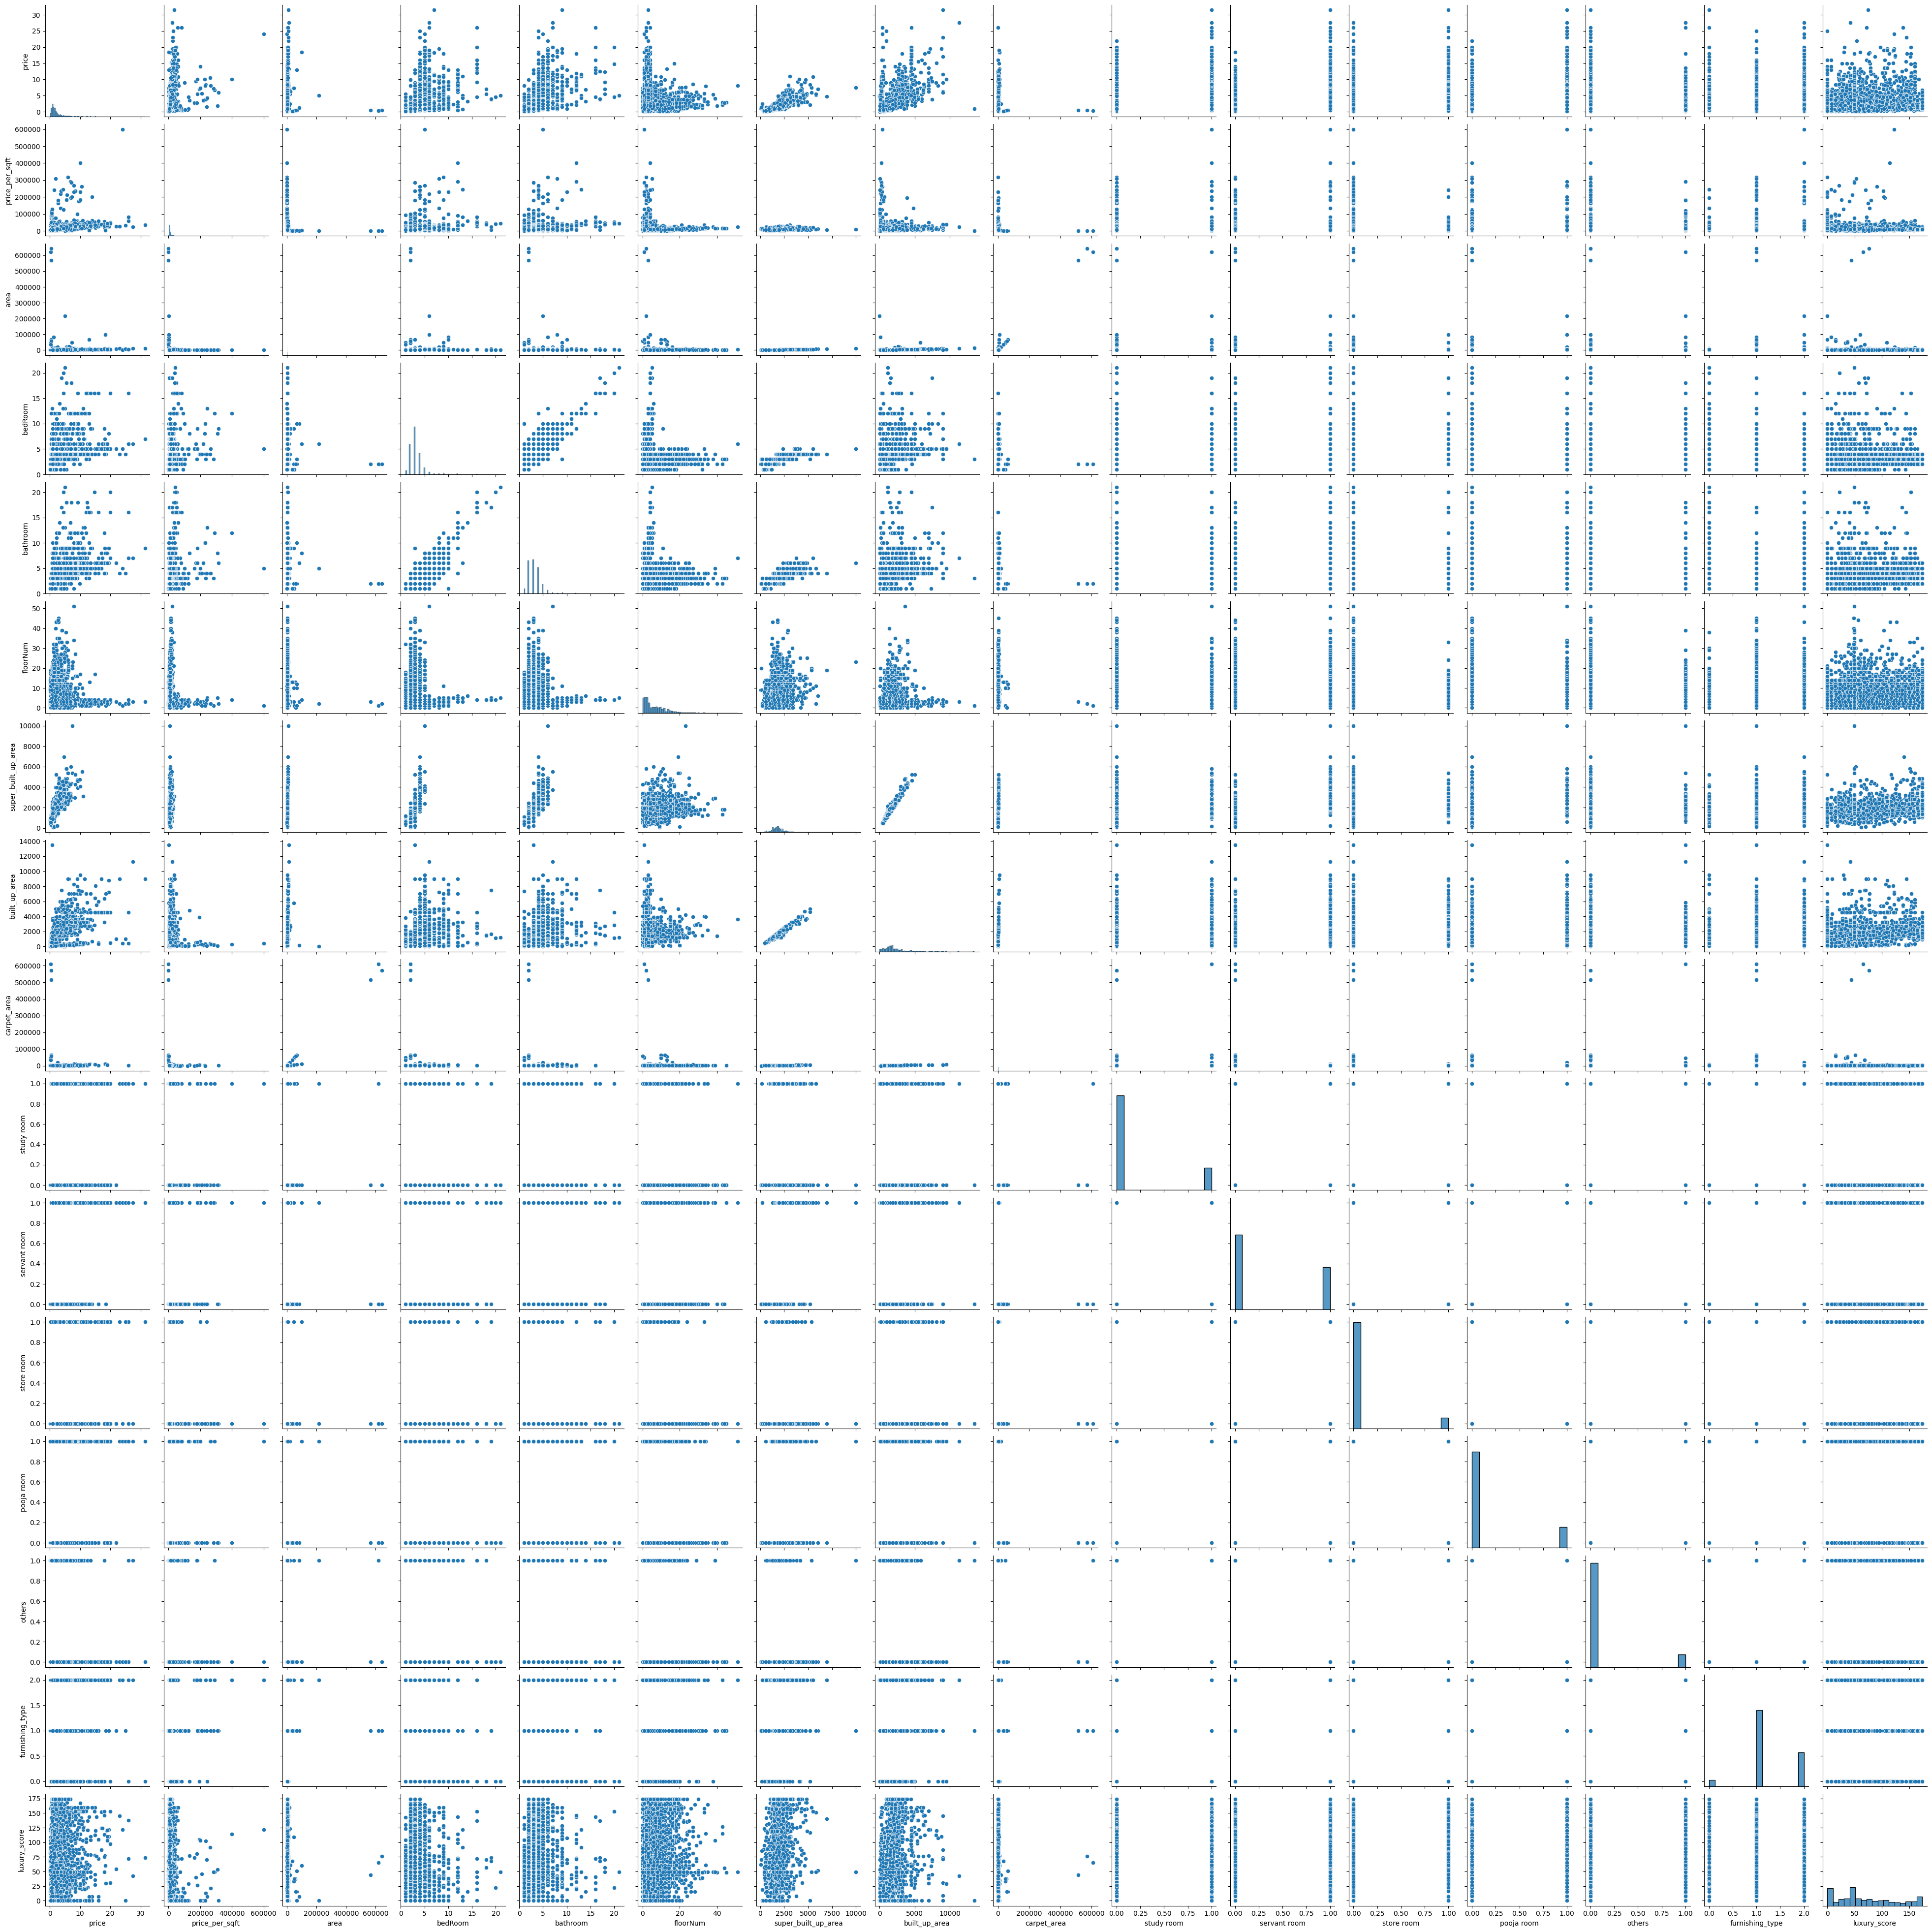

In [72]:
sns.pairplot(df)